<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/word_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np


In [2]:
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import io

In [33]:
import nltk
from nltk.corpus import stopwords

In [22]:
train = pd.read_csv('drive/My Drive/clean_data.csv')

In [34]:
import itertools

In [29]:
words = []
not_work = []
counter = 0
for txt in train['comment_text']:
  try:
    counter+=1
    words.append(txt.lower().split())
  except:
    print(counter)
    not_work.append(counter-1)
    cast = str(txt)
    words.append(cast.lower().split())
    

53788
64905
76038
106892
141294
163252
168947
178687
193980
200639
202962
204722
210602
213686
217811


In [31]:
for num in not_work:
  print(train['comment_text'][num])
  print(train0['comment_text'][num])
  print()

nan
92.24.199.233|92.24.199.233]]

nan
http://en.wikipedia.org/wiki/Wikipedia_talk:No_original_research/archive15#YouTube_art_as_primary_source

nan
http://finance.yahoo.com/news/7-fascinating-nuggets-another-bewildering-150348488.html

nan
http://en.wikipedia.org/wiki/Wikipedia:ELYES

nan
http://www.haaretz.com/news/diplomacy-defense/2-279-calories-per-person-how-israel-made-sure-gaza-didn-t-starve.premium-1.470419

nan
http://en.wikipedia.org/wiki/Half-Life_%28series%29

nan
:http://knowyourmeme.com/memes/baneposting

nan
:

nan
:::

nan
{{

nan
http://es.wikipedia.org/wiki/Usuario_Discusi%C3%B3n:Sarah_W.

nan
*

nan
}}

nan
http://en.wikipedia.org/wiki/Rayleigh%E2%80%93B%C3%A9nard_convection

nan
~



In [36]:
import collections

In [ ]:
words

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
stop_words = set(stopwords.words('english'))

In [42]:
without_stop = [[word for word in ww if not word in stop_words]
                for ww in words]

In [49]:
all_words = list(itertools.chain(*without_stop))
all_words_count = collections.Counter(all_words)

In [50]:
all_words_count.most_common(15)

[('article', 76939),
 ('page', 60112),
 ('wikipedia', 46470),
 ('would', 40436),
 ('please', 39261),
 ('one', 38576),
 ('like', 38138),
 ('talk', 36604),
 ('dont', 34779),
 ('see', 29392),
 ('think', 28094),
 ('also', 27954),
 ('im', 26861),
 ('know', 25628),
 ('people', 24260)]

In [51]:
len(without_stop)

223549

In [54]:
most_common = pd.DataFrame(all_words_count.most_common(20),
                           columns = ['words','count'])

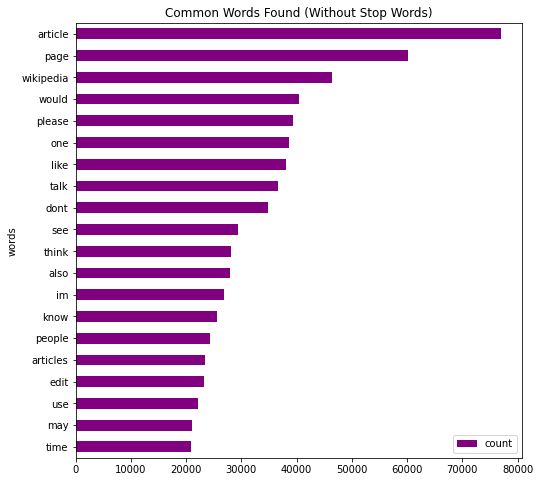

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
most_common.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found (Without Stop Words)")

plt.show()